In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [16]:
path = "./alignData"

dataDict = {}
with open(path, mode ='r')as file:
    csvFile = csv.reader(file, delimiter=";")
    headerSkipped = False
    for lines in csvFile:
        if (not headerSkipped): 
            headerSkipped = True
            continue
        [noise, case, time, cost] = lines
        if (not noise in dataDict): 
            dataDict[noise] = []
        dataDict[noise].append([time, cost])

In [71]:
def avg(x):
    return sum(x) / len(x)

allData = []
for noise in dataDict:
    data = dataDict[noise]
    timeouts = list(filter(lambda point: point[0] == "TIMEOUT", data))
    nonTimeouts = list(filter(lambda point: point[0] != "TIMEOUT", data))
    allData += nonTimeouts
    print(noise)
    print("TIMEOUT %", len(timeouts) / len(data))
    
    costs = list(map(lambda point: int(point[1]), nonTimeouts))
    print("Avg non-timeout cost", avg(costs))

    times = list(map(lambda point: float(point[0]), nonTimeouts))
    print("Avg non-timeout runtime", avg(times))

5
TIMEOUT % 0.0
Avg non-timeout cost 1.6
Avg non-timeout runtime 0.5148718232462183
10
TIMEOUT % 0.046511627906976744
Avg non-timeout cost 2.341463414634146
Avg non-timeout runtime 1.846328393329287
15
TIMEOUT % 0.03225806451612903
Avg non-timeout cost 3.2222222222222223
Avg non-timeout runtime 10.74393574917778
20
TIMEOUT % 0.12121212121212122
Avg non-timeout cost 3.954022988505747
Avg non-timeout runtime 18.31836722970119
25
TIMEOUT % 0.25510204081632654
Avg non-timeout cost 4.52054794520548
Avg non-timeout runtime 29.260482892616306
30
TIMEOUT % 0.3
Avg non-timeout cost 4.9
Avg non-timeout runtime 41.68193066740047
35
TIMEOUT % 0.32
Avg non-timeout cost 5.544117647058823
Avg non-timeout runtime 44.70789154972092
40
TIMEOUT % 0.48
Avg non-timeout cost 5.615384615384615
Avg non-timeout runtime 51.45477708755777


In [113]:
plotDict = {}
for point in allData:
    [runtime, cost] = point
    if (not cost in plotDict): plotDict[cost] = []
    plotDict[cost].append(float(runtime))
 
costs = list(map(lambda x: int(x), plotDict.keys()))
costs.sort();
runtimes = list(map(lambda cost: avg(plotDict[str(cost)]), costs))

587

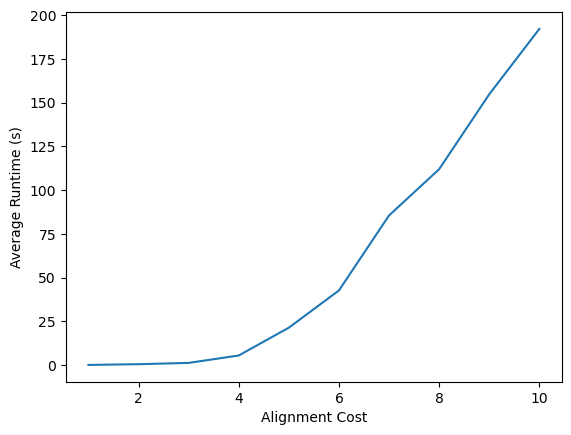

In [111]:
plt.plot(costs, runtimes)
plt.xlabel("Alignment Cost")
plt.ylabel("Average Runtime (s)")
plt.savefig('align_benchmark.png', bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>